<a href="https://colab.research.google.com/github/Shreya-Mendi/XAI/blob/main/Interpretable-AI/interpretableML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Layout: Kaggle Dataset Analysis & Modeling

## 1. Introduction
- Brief description of the dataset and problem statement
: dataset from a telecommunications company (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code). 

Tasks : 

Exploratory Data Analysis to check Assumptions
Linear Regression
Logistic Regression 
Generalized Additive Model (GAM) 
Model Comparison

## 2. Data Loading
- Load dataset from repo

## 3. Exploratory Data Analysis (EDA)
- Data overview (shape, columns, types)
- Missing values analysis
- Visualizations (histograms, boxplots, correlation heatmap)

## 4. Data Preprocessing
- Handling missing values
- Feature engineering
- Encoding categorical variables
- Train-test split

## 5. Linear Regression
- Model training
- Evaluation (metrics, residual plots)

## 6. Logistic Regression
- Model training 
- Evaluation (metrics, confusion matrix)

## 7. Generalized Additive Models (GAM)
- Model training
- Evaluation (metrics, plots)

## 8. Model Comparison
- residual and q-q plot 

## 9. Conclusions 
- Summary of findings

--comments generated with gemini 2.5 flash on 9/12/2025

In [183]:
# data loading into data frame and dataprep (included import from all following sections)
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from pygam import LogisticGAM, s


df=pd.read_csv("data.csv")

# print(df.describe(include='all'))
# print(df.info())
# print(df.head())
# print(df.nunique())

# checking why total charges is object
# empty_charges = df[df['TotalCharges'].str.contains(' ', na=False, regex=False)]
# if not empty_charges.empty:
#    print("\nRows with empty strings in 'TotalCharges':")
#    print(empty_charges)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna({'TotalCharges':0} , inplace=True)
# print(df.info())

# preparing data for models
# Separate features (X) and target (y)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

# data split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# encoding categorical data(not using onehot encoder because of numpy to pandas conversion)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train_encoded_categorical = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_test_encoded_categorical = pd.get_dummies(X_test[categorical_cols], drop_first=True)

X_train_final = pd.concat([X_train[numerical_cols], X_train_encoded_categorical], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_encoded_categorical], axis=1)

bool_cols = X_train_final.select_dtypes(include='bool').columns
X_train_final[bool_cols] = X_train_final[bool_cols].astype(int)
X_test_final[bool_cols] = X_test_final[bool_cols].astype(int)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_final)
X_test_scaled=scaler.fit_transform(X_test_final)


# print (X_train_final.info())
# print (X_test_final.info())
# print(y_train.info())



Churn distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


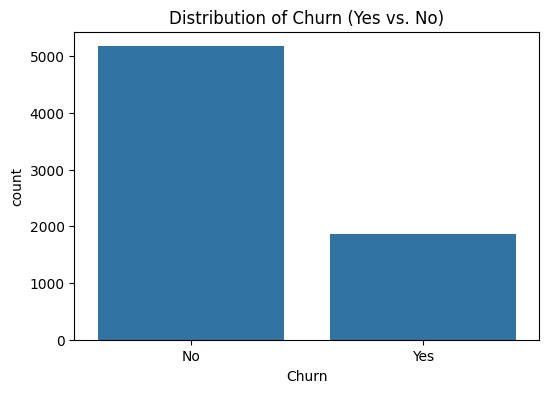

significant class imbalance. Stratifying split and using appropriate class weights


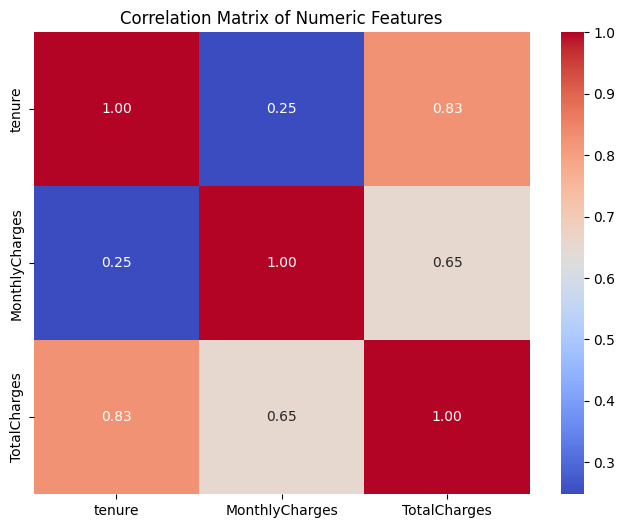

tenure vs. TotalCharges (0.83):  very strong positive correlation
MonthlyCharges vs.TotalCharges (0.65): strong positive correlation
tenure vs. MonthlyCharges (0.25): weak positive correlation
Might have to either remove Total charges or use penalties/regularization(lasso ridge)
                                  feature          VIF
11                     InternetService_No          inf
12     OnlineSecurity_No internet service          inf
20        StreamingTV_No internet service          inf
18        TechSupport_No internet service          inf
16   DeviceProtection_No internet service          inf
14       OnlineBackup_No internet service          inf
22    StreamingMovies_No internet service          inf
7                        PhoneService_Yes  1719.933769
2                          MonthlyCharges   854.183600
10            InternetService_Fiber optic   146.040426
8          MultipleLines_No phone service    61.784024
23                    StreamingMovies_Yes    23.755455
21   

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


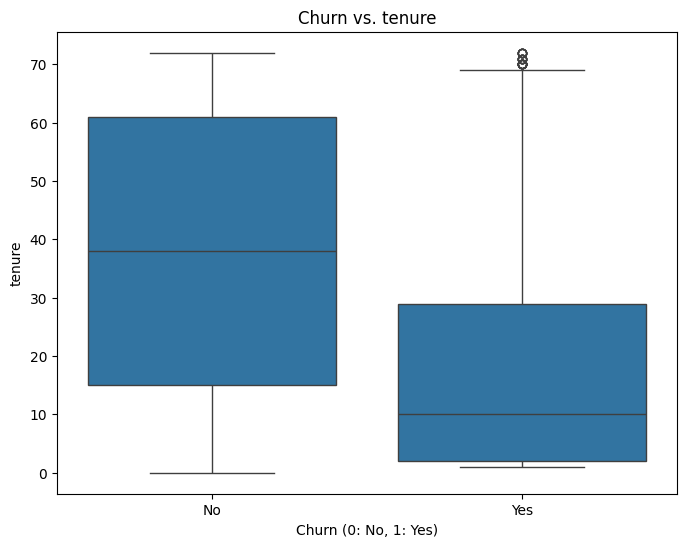

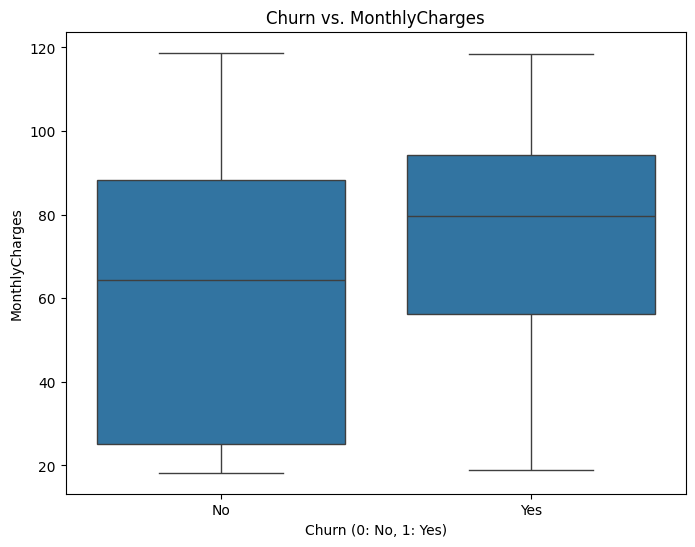

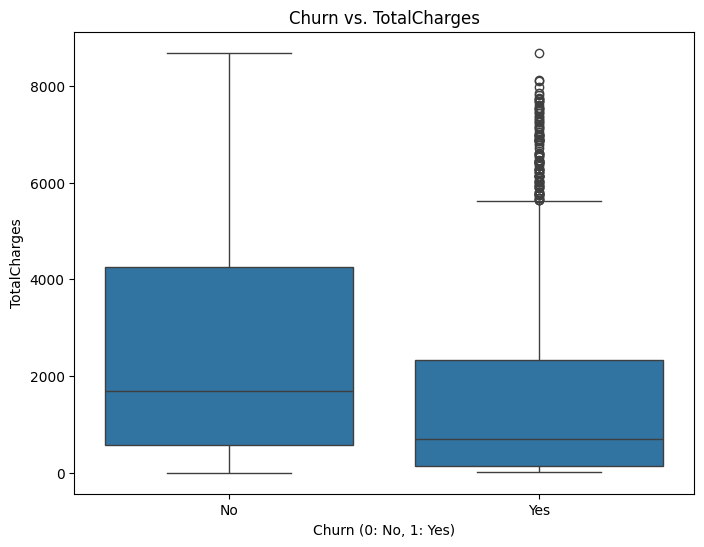

Tenure:People who have lower tenure are more likely to churn
 Monthly charges:People with slightly higher monthly charges have churned
Total charges:Lower Total charges have churned but many outliers in the data


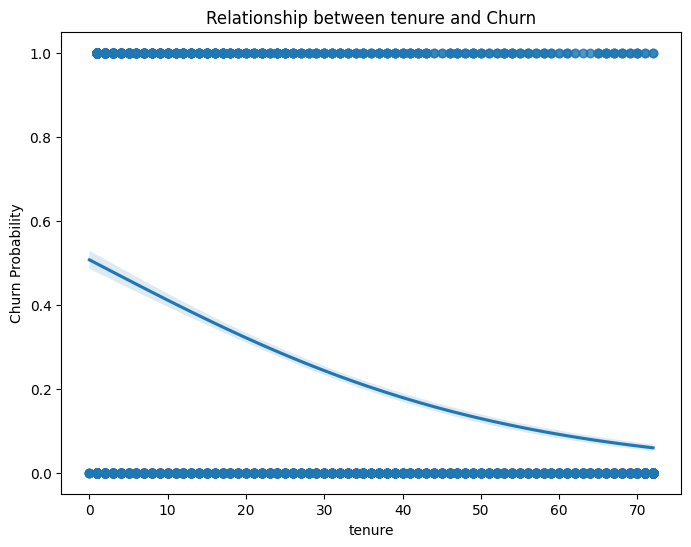

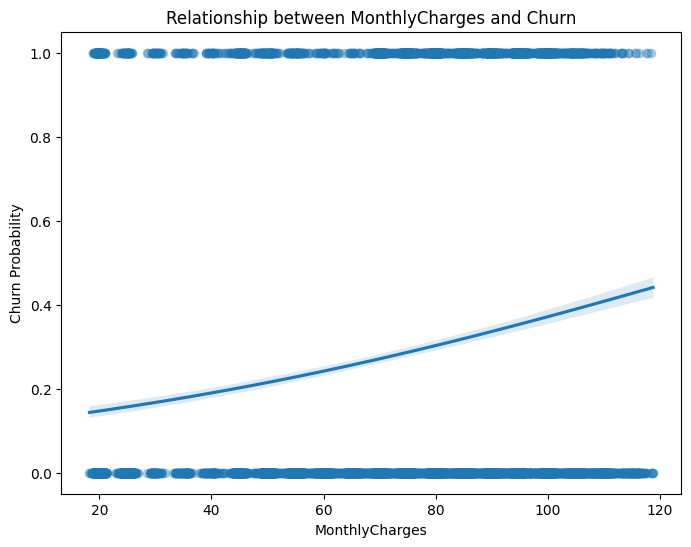

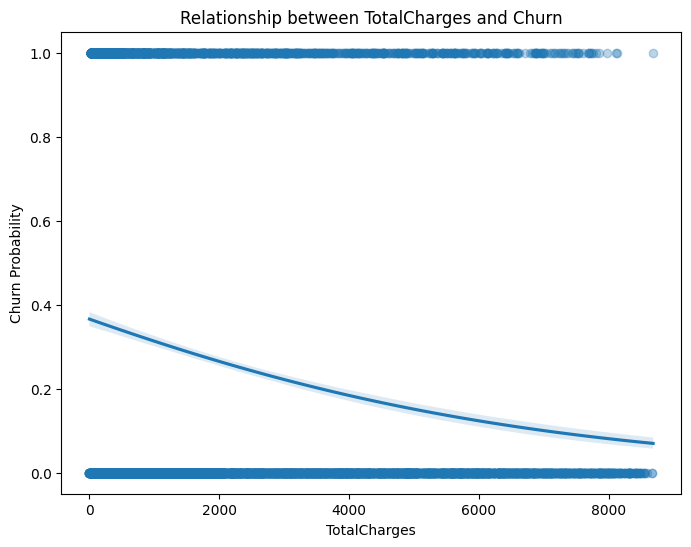

High churn for low tenure and total charges.
 Low churn for low monthly costs


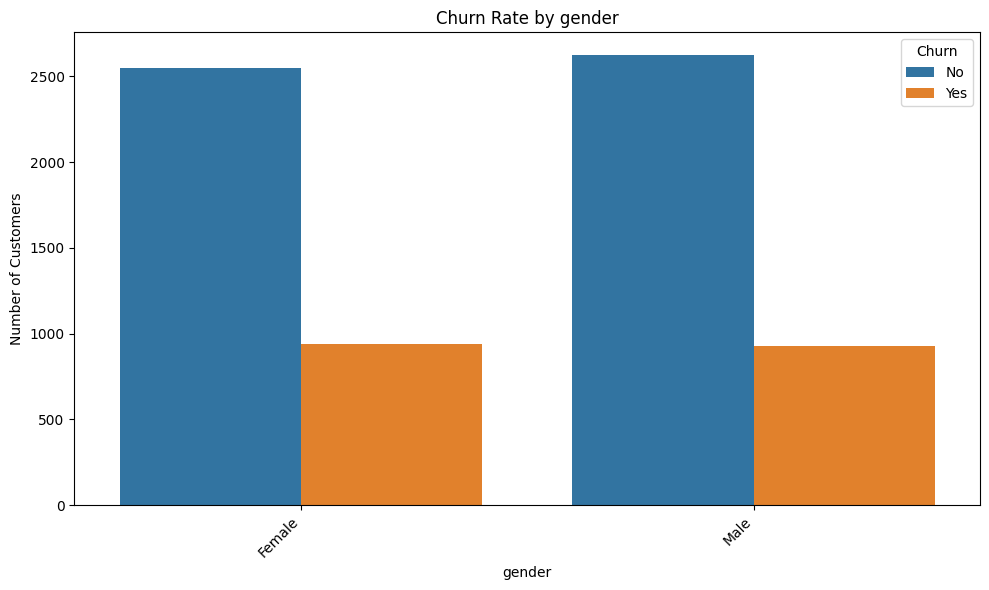

--- Churn Rate by gender ---
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338




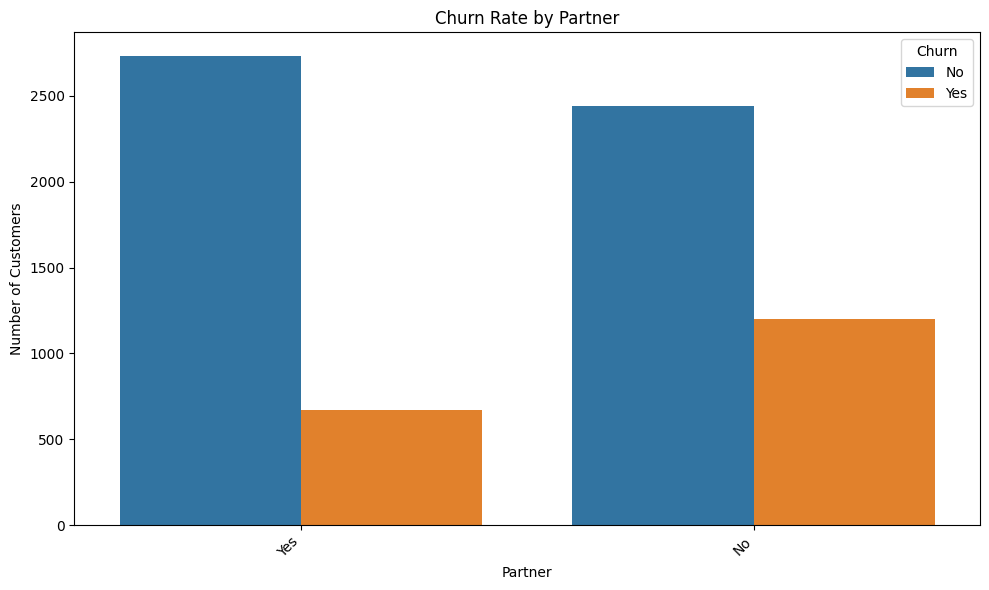

--- Churn Rate by Partner ---
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903




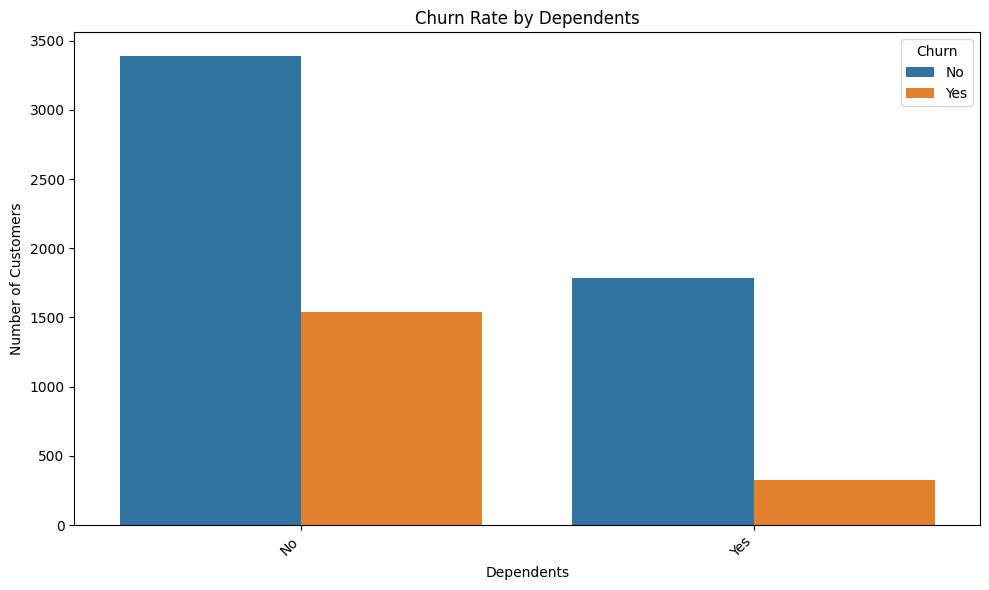

--- Churn Rate by Dependents ---
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237




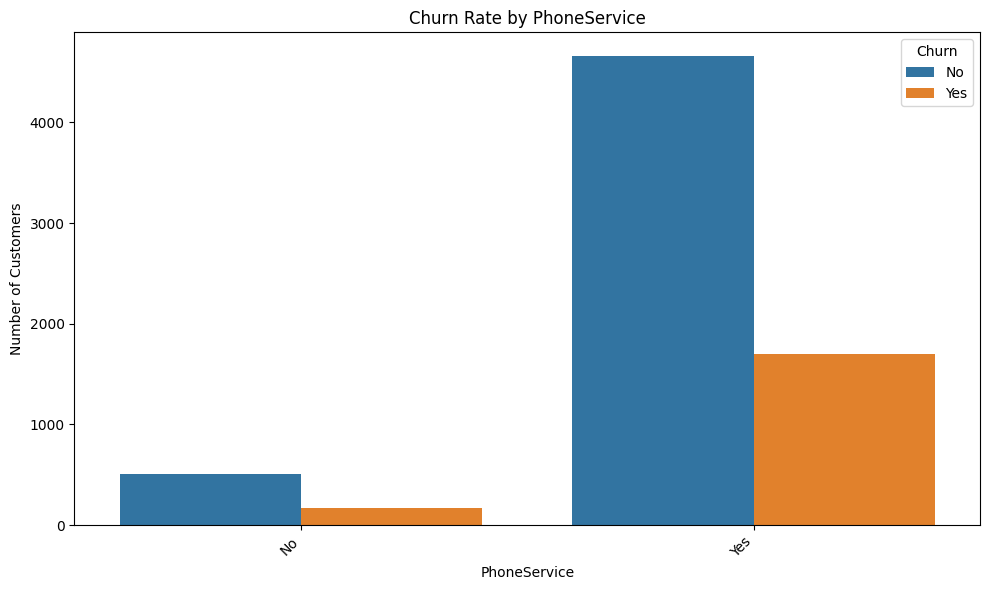

--- Churn Rate by PhoneService ---
Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637




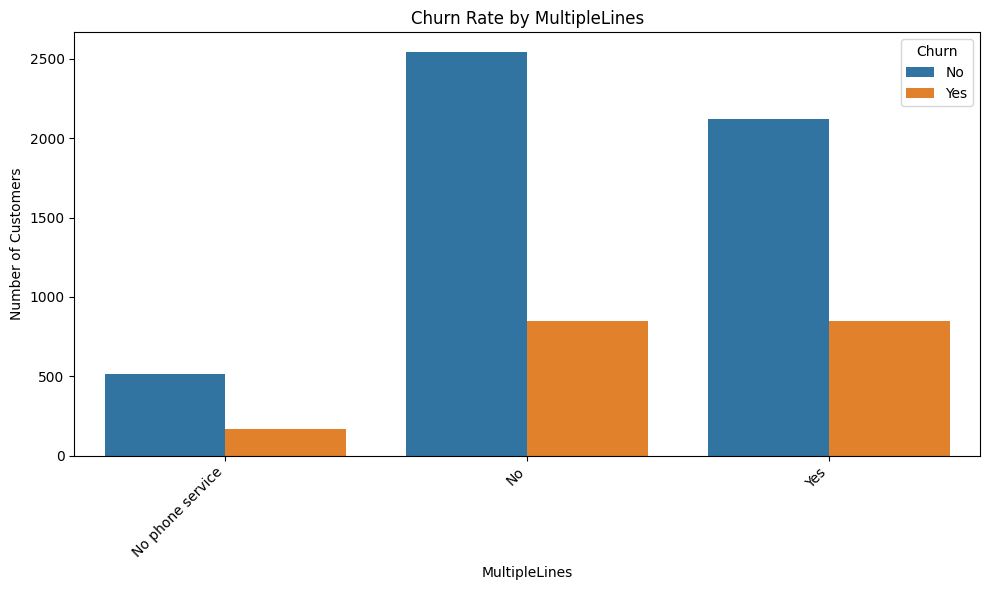

--- Churn Rate by MultipleLines ---
Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896




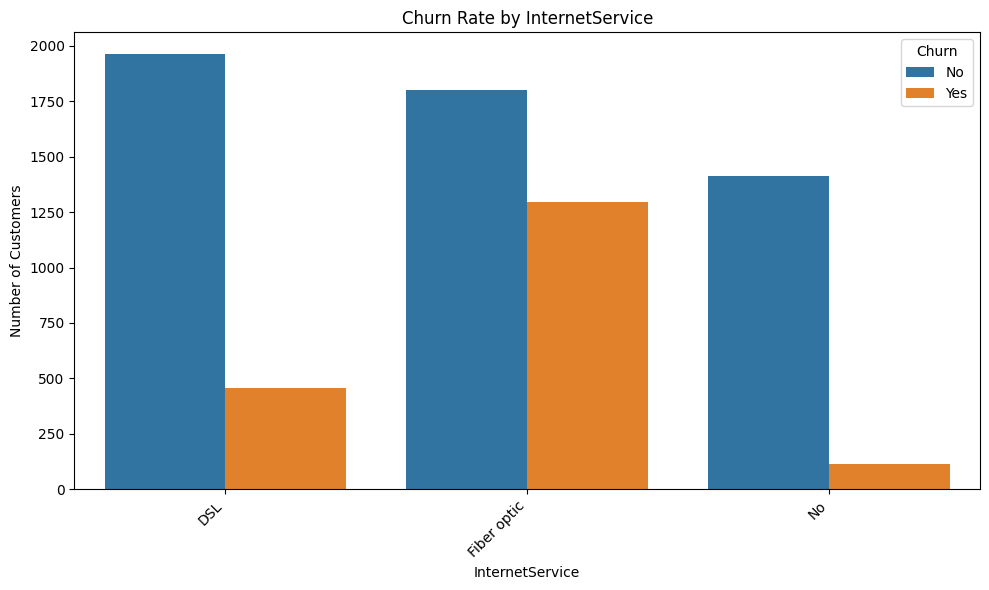

--- Churn Rate by InternetService ---
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980




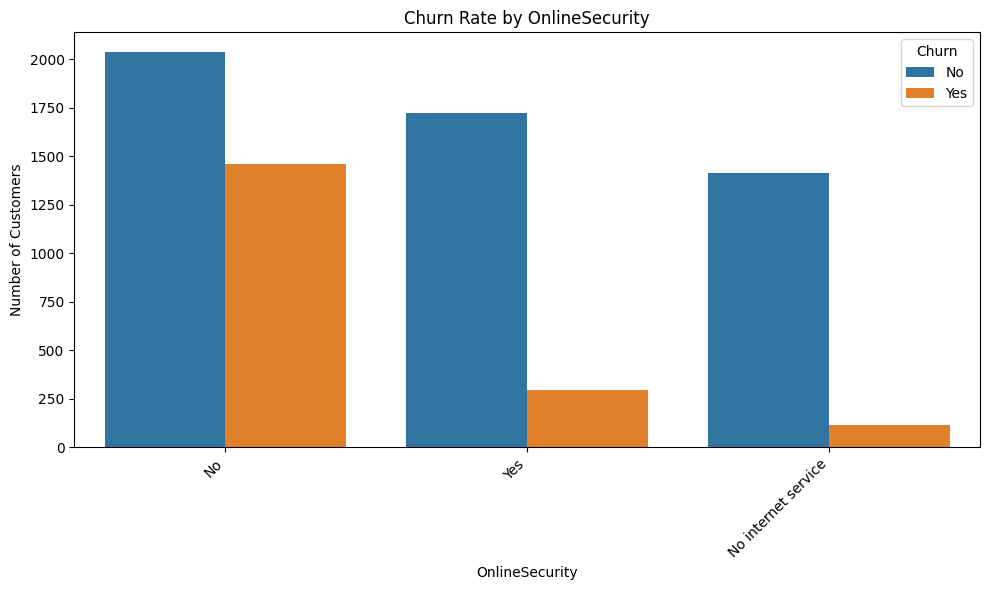

--- Churn Rate by OnlineSecurity ---
Churn                       No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194




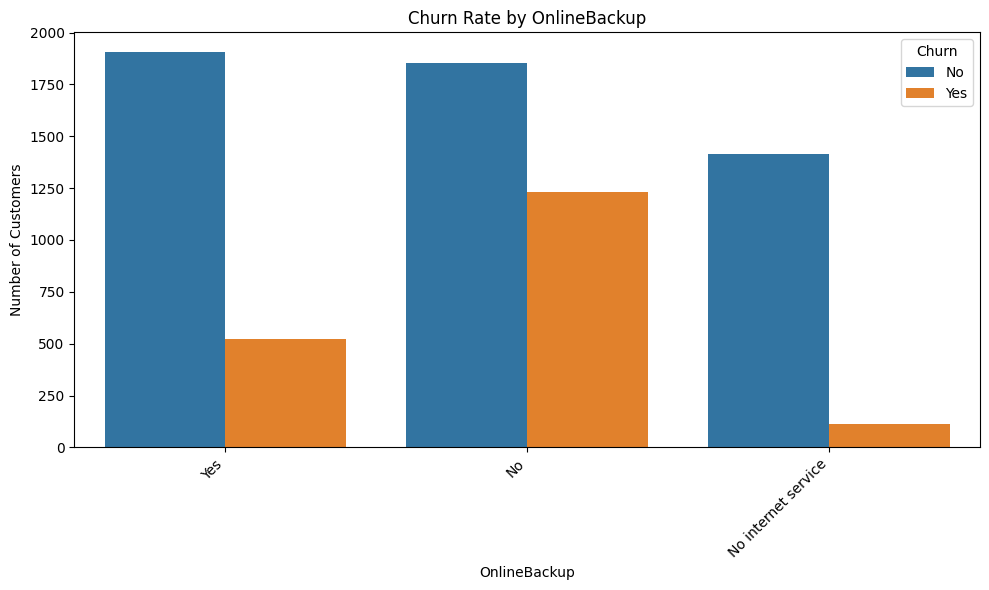

--- Churn Rate by OnlineBackup ---
Churn                       No        Yes
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  78.468506  21.531494




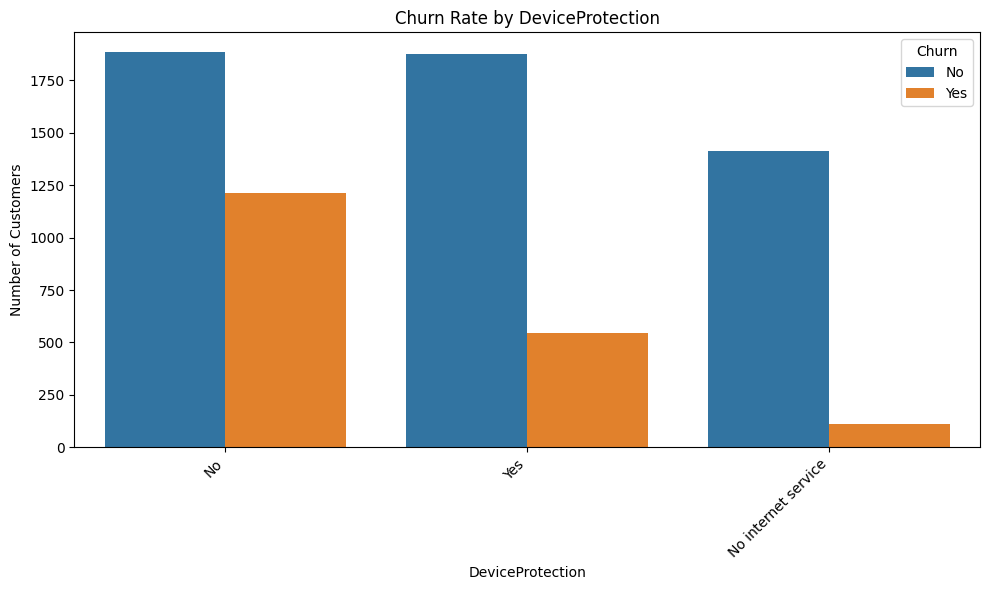

--- Churn Rate by DeviceProtection ---
Churn                       No        Yes
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064




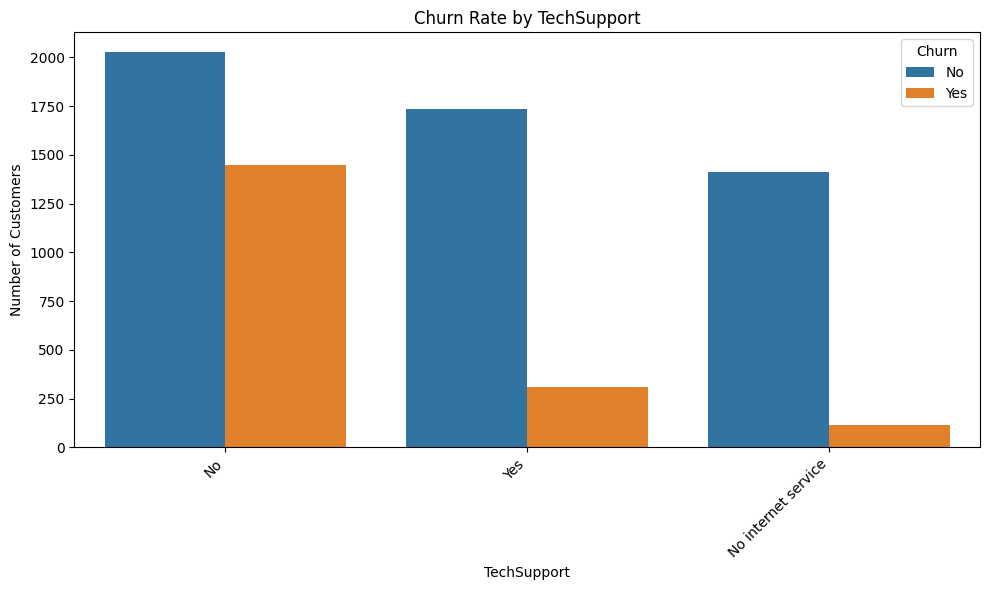

--- Churn Rate by TechSupport ---
Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341




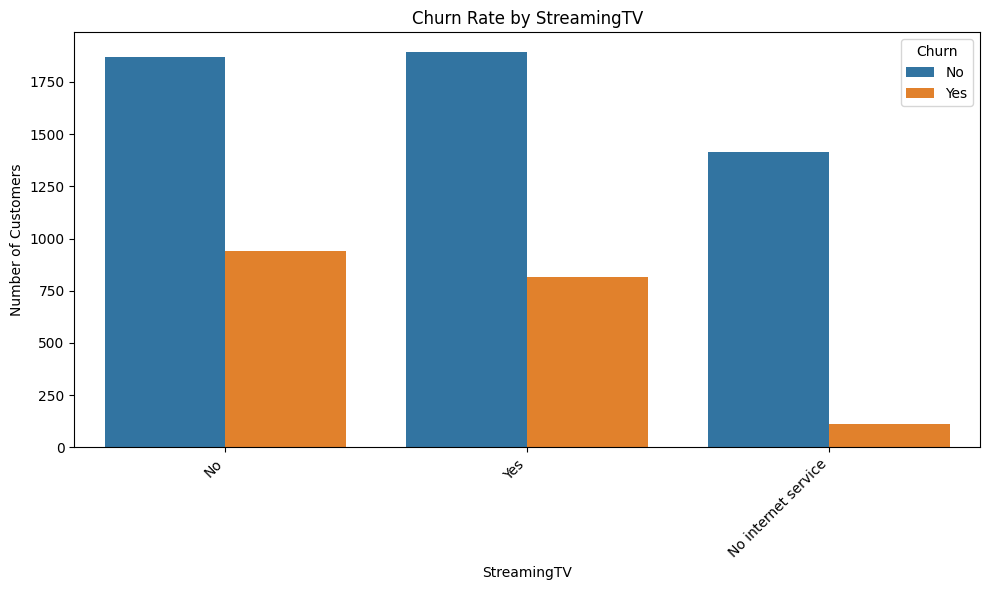

--- Churn Rate by StreamingTV ---
Churn                       No        Yes
StreamingTV                              
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188




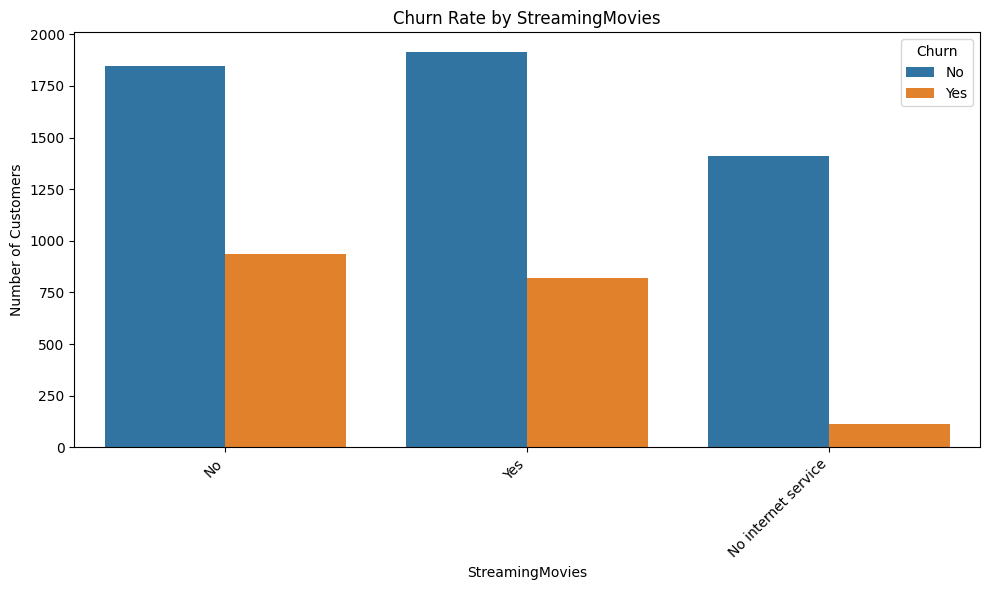

--- Churn Rate by StreamingMovies ---
Churn                       No        Yes
StreamingMovies                          
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435




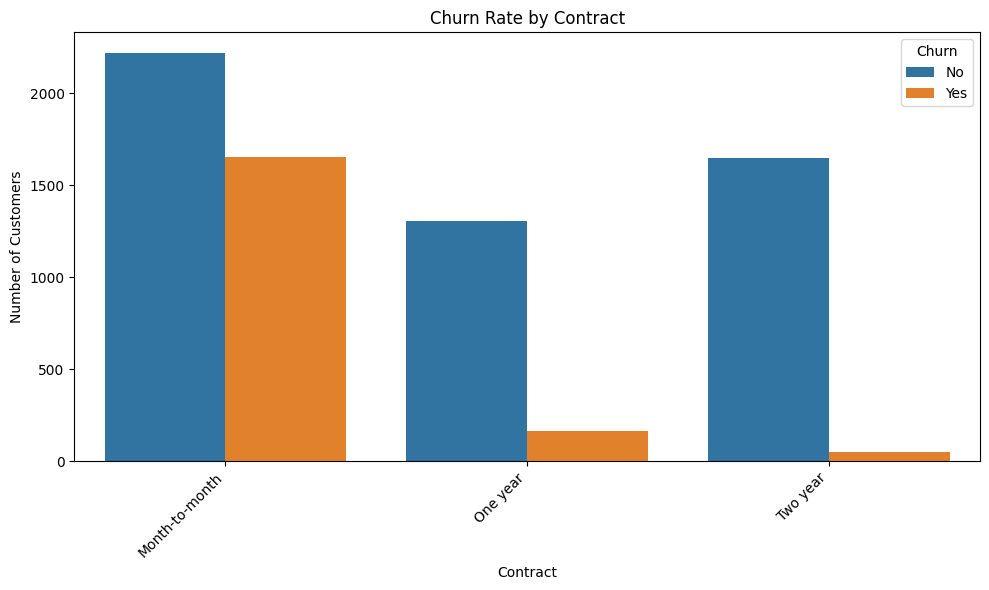

--- Churn Rate by Contract ---
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858




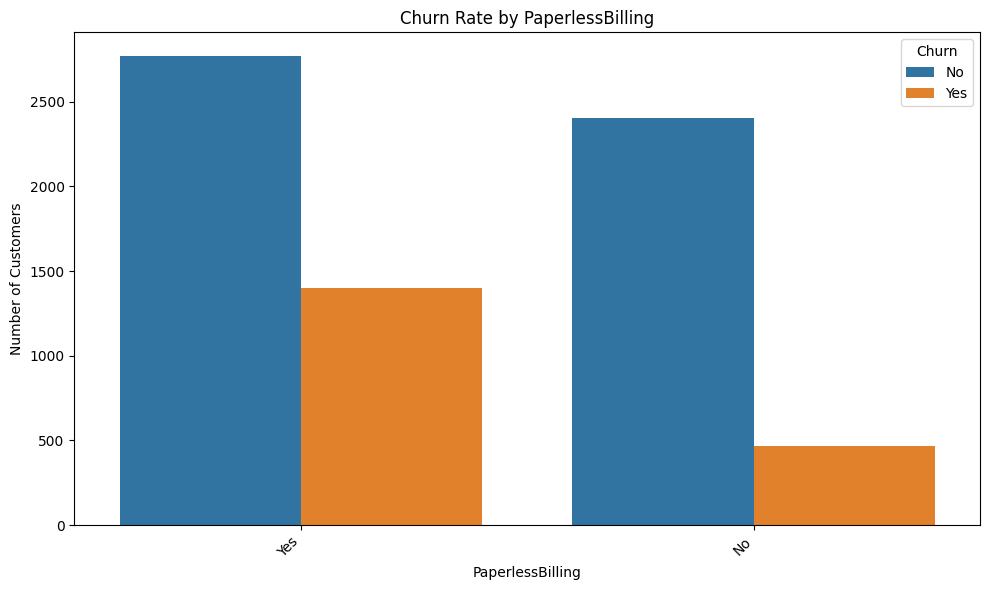

--- Churn Rate by PaperlessBilling ---
Churn                    No        Yes
PaperlessBilling                      
No                83.669916  16.330084
Yes               66.434908  33.565092




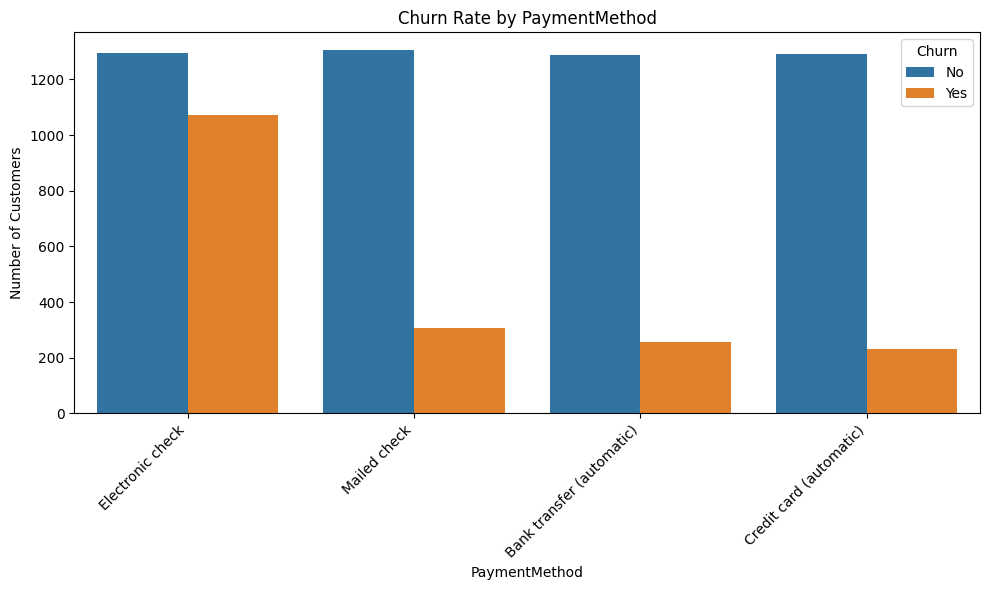

--- Churn Rate by PaymentMethod ---
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700




In [184]:
# Eda and Assumption check

# Class Imbalance check 

print("Churn distribution:")
print(df['Churn'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn (Yes vs. No)')
plt.show()

print ("significant class imbalance. Stratifying split and using appropriate class weights")

# Multicollinearity 

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

print("tenure vs. TotalCharges (0.83):  very strong positive correlation\nMonthlyCharges vs.TotalCharges (0.65): strong positive correlation\ntenure vs. MonthlyCharges (0.25): weak positive correlation")
print("Might have to either remove Total charges or use penalties/regularization(lasso ridge)")

# VIF score ( generated with help from gemini 2.5 flash on 9/14/2025)

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_final.values, i) for i in range(len(X_train_final.columns))]
print(vif_data.sort_values(by='VIF', ascending=False))

print(" VIF = inf is extreme colinearity ,  will remove all the features with this \n  (VIF > 10): High Multicollinearity .\n below 10 acceptable. ")


#  Relationships & Outliers - Box Plots
for feature in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Churn vs. {feature}')
    plt.xlabel('Churn (0: No, 1: Yes)')
    plt.ylabel(feature)
    plt.show()

print("Tenure:People who have lower tenure are more likely to churn\n Monthly charges:People with slightly higher monthly charges have churned\nTotal charges:Lower Total charges have churned but many outliers in the data")


#  Linearity 

# for categorical features = compare the churn rate between categories. don't need to check for a linear relationship.
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
for feature in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature, y='Churn_numeric', data=df, logistic=True, scatter_kws={'alpha': 0.3})
    plt.title(f'Relationship between {feature} and Churn')
    plt.xlabel(feature)
    plt.ylabel('Churn Probability')
    plt.show()

print ("High churn for low tenure and total charges.\n Low churn for low monthly costs")  


# EDA for categorical features

categorical_cols = df.select_dtypes(include=['object']).columns
features_to_plot = [col for col in categorical_cols if col not in ['customerID', 'Churn']]

# Loop through each categorical feature and plot
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"--- Churn Rate by {feature} ---")
    churn_rates = pd.crosstab(df[feature], df['Churn'], normalize='index') * 100
    print(churn_rates)
    print("\n" + "="*50 + "\n")

## used gemini 2.5 flash on 9/14/2025 at 11:30 am to help with above code


EDA observations:

significant class imbalance. Stratifying split and using appropriate class weights.

tenure vs. TotalCharges (0.83):  very strong positive correlation\nMonthlyCharges vs.TotalCharges (0.65): strong positive correlation\ntenure vs. MonthlyCharges (0.25): weak positive correlation

                                feature          VIF
11                     InternetService_No          inf

12     OnlineSecurity_No internet service          inf

20        StreamingTV_No internet service          inf

18        TechSupport_No internet service          inf

16   DeviceProtection_No internet service          inf

14       OnlineBackup_No internet service          inf

22    StreamingMovies_No internet service          inf

(will be eliminating in the GAM model for better accuracy)

Tenure:People who have lower tenure are more likely to churn
Monthly charges:People with slightly higher monthly charges have churned
Total charges:Lower Total charges have churned but many outliers in the data

High churn for low tenure and total charges.\n Low churn for low monthly costs


R-squared: 0.2747
Mean Absolute Error (MAE): 0.2984
Mean Squared Error (MSE): 0.1414
Root Mean Squared Error (RMSE): 0.3761


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


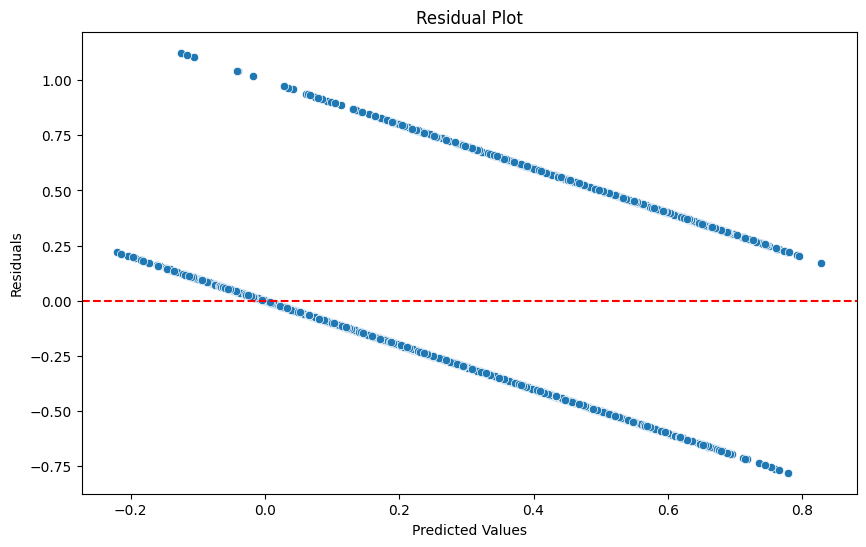

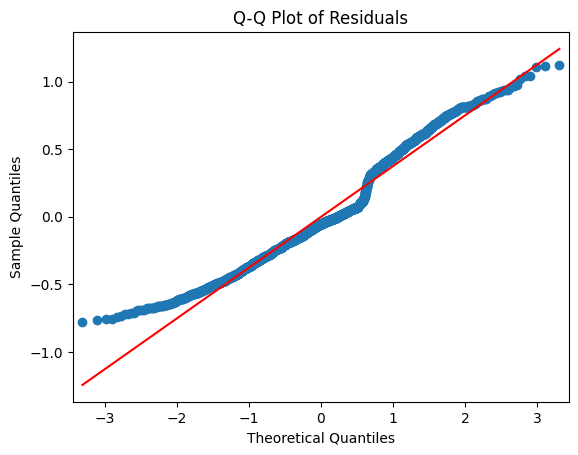

All metrics for performance are bad in this model.Even with optimization and regularization of the data, a linear model would not be able to predict churn as the data to predict is not continous or has a linear relation.
. Hence we will not be using this model


In [188]:
# model creations 

# linear Regression 

# Instantiate the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train_final, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test_final)

# metrics
r2 = r2_score(y_test, y_pred_lin)
print(f'R-squared: {r2:.4f}')

# MAE .
mae = mean_absolute_error(y_test, y_pred_lin)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# MSE 
mse = mean_squared_error(y_test, y_pred_lin)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# RMSE 
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


# Calculate the residuals
residuals = y_test - y_pred_lin
results = pd.DataFrame({'Residuals': residuals, 'Predicted': y_pred_lin})

# Residual Plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=results)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Q-Q Plot 
fig = sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

print("All metrics for performance are bad in this model.Even with optimization and regularization of the data, a linear model would not be able to predict churn as the data to predict is not continous or has a linear relation.\n. Hence we will not be using this model")


## used gemini 2.5 flash on 9/14/2025 at 12:30 am to help with above code on residual plot and q-q plots




R-squared: 0.2747
Mean Absolute Error (MAE): 0.2984
Mean Squared Error (MSE): 0.1414
Root Mean Squared Error (RMSE): 0.3761 

All metrics for performance are bad in this model.Even with optimization and regularization of the data, a linear model would not be able to predict churn as the data to predict is not continous or has a linear relation. Hence we will not be using this model.


In [189]:
# Logistic Regression

# Instantiate the model with a balanced class weight to handle imbalance use lasso and ridge for feature selection
log_reg = LogisticRegression(solver='liblinear',random_state=42, class_weight='balanced')
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_final, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation AUC-ROC Score: {grid_search.best_score_:.4f}")

best_model.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_log = best_model.predict(X_test_final)

# Evaluate the model
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

## used gemini 2.5 flash on 9/14/2025 at 1:30 am to help with above code on grid searches and using gridcv



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

Best Parameters: {'C': 1, 'penalty': 'l1'}
Best Cross-Validation AUC-ROC Score: 0.8457
Logistic Regression Metrics:
Accuracy: 0.74

Confusion Matrix:
[[1123  429]
 [ 113  448]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1552
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

Best Parameters: {'C': 1, 'penalty': 'l1'}
Best Cross-Validation AUC-ROC Score: 0.8457
Logistic Regression Metrics:
Accuracy: 0.74

Confusion Matrix:
[[1123  429]
 [ 113  448]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1552
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113


The model is excellent at identifying at-risk customers (high recall) but is not very accurate with its positive predictions (low precision).

  0% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
 14% (1 of 7) |###                       | Elapsed Time: 0:00:00 ETA:   0:00:03
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-pack

GAM Model Metrics:
Accuracy: 0.7998
AUC Score: 0.7106

Confusion Matrix:
[[1398  154]
 [ 269  292]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     42.9699
Link Function:                        LogitLink Log Likelihood:                                 -1979.7524
Number of Samples:                         4930 AIC:                                             4045.4446
              

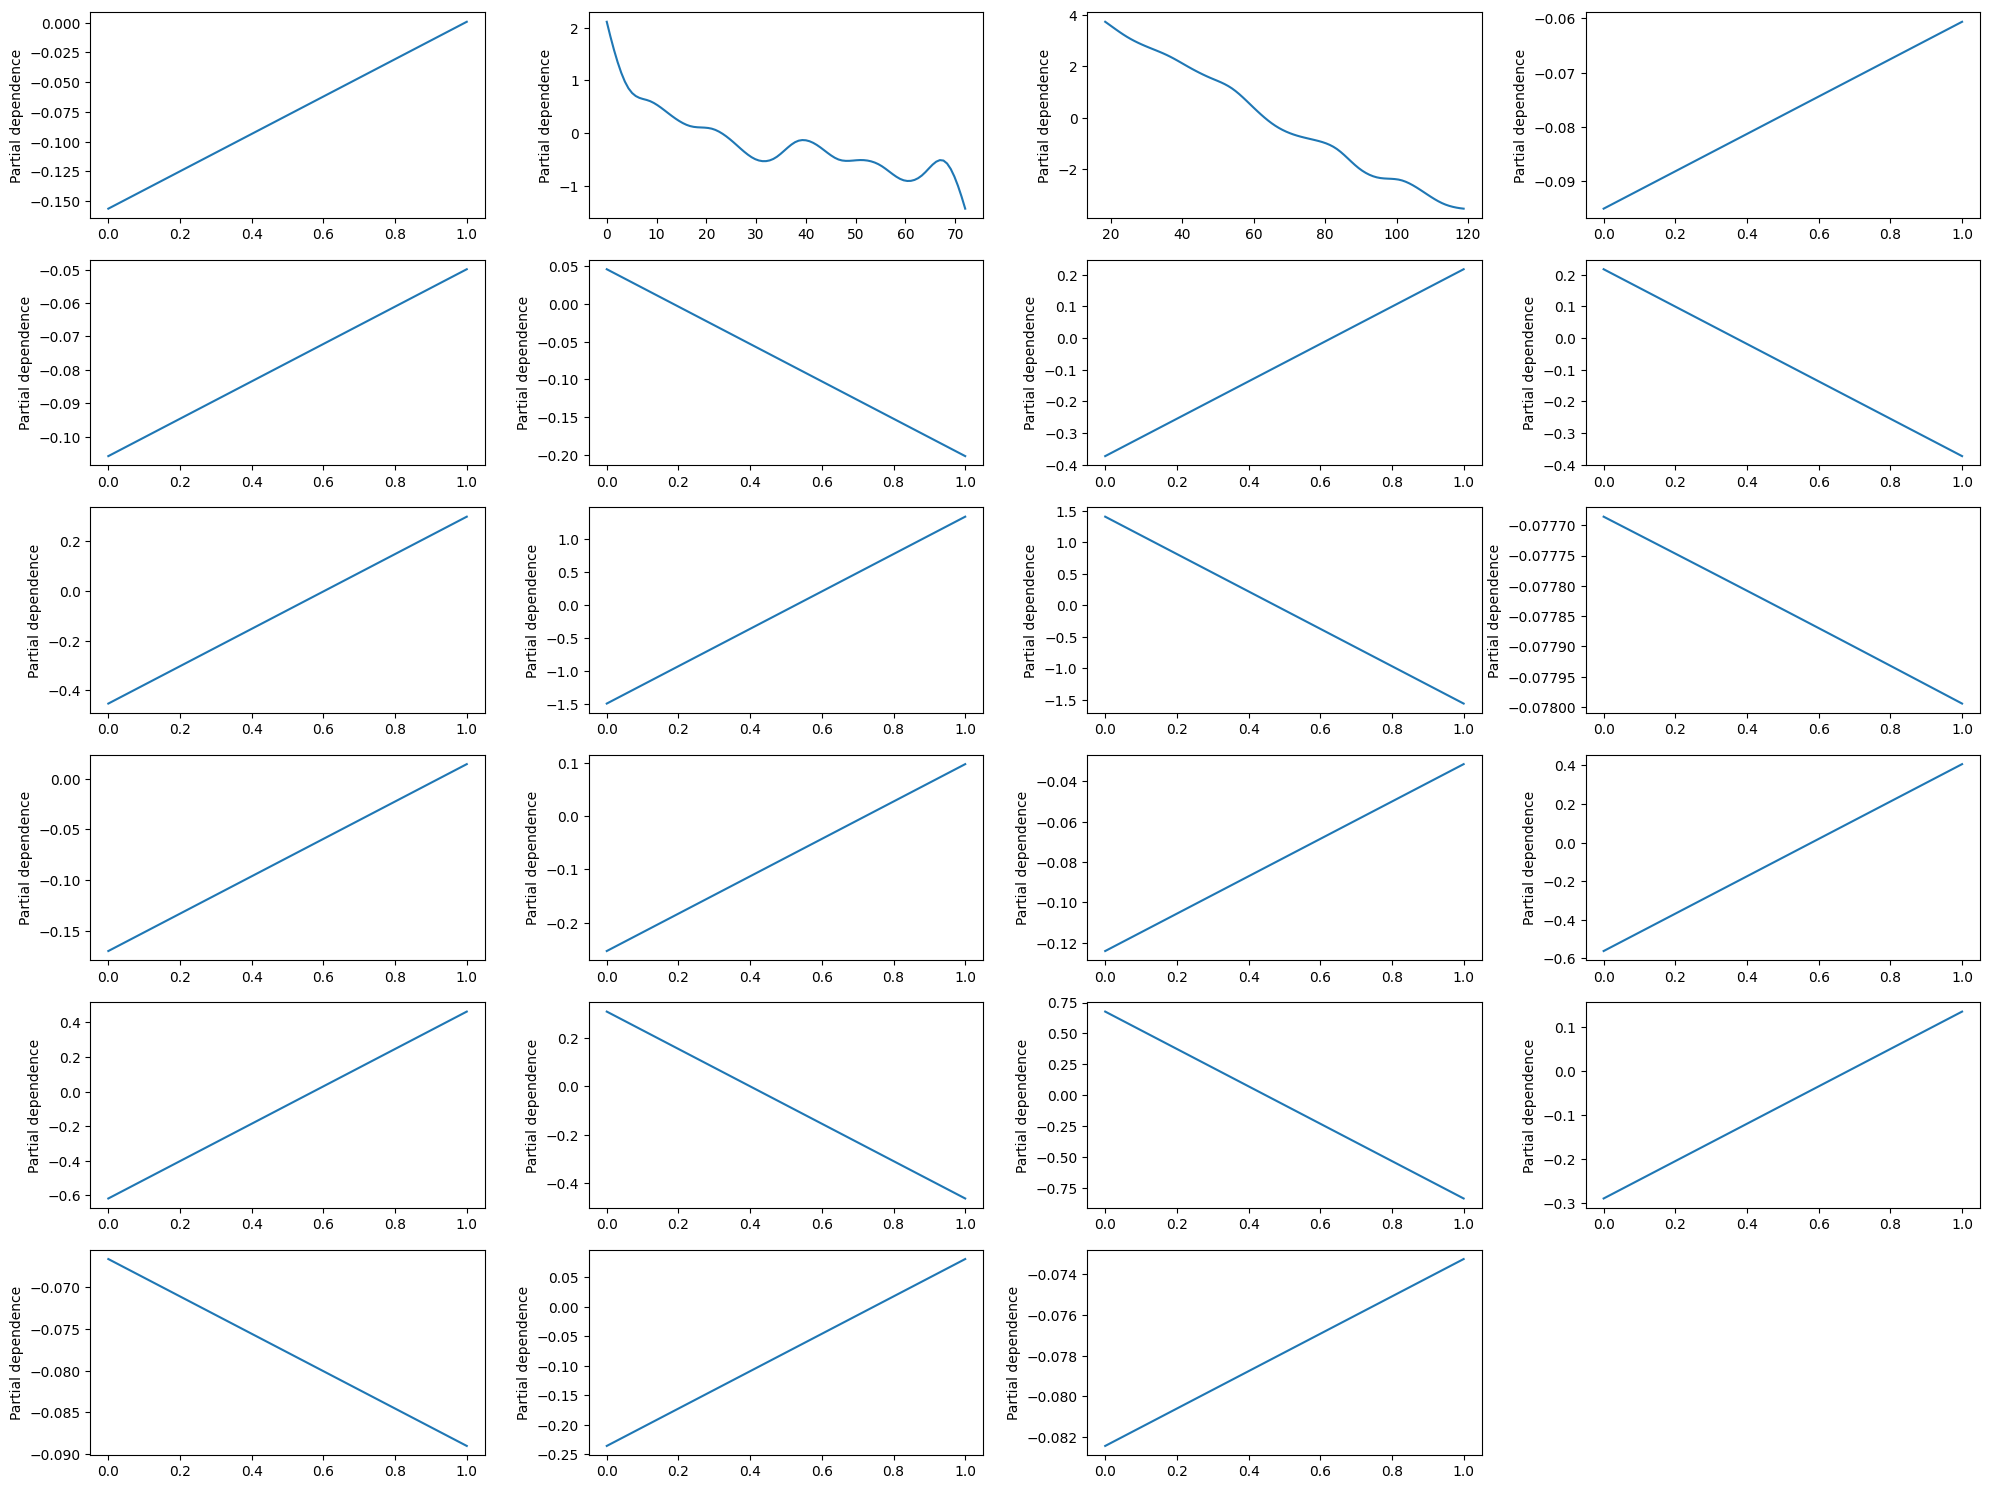

In [195]:
# GAM models 

gam = LogisticGAM()

# based on the VIF outputs dropping all columns with very high/inf collinearity

columns_to_drop = [
    'OnlineSecurity_No internet service',
    'StreamingTV_No internet service',
    'TechSupport_No internet service',
    'DeviceProtection_No internet service',
    'OnlineBackup_No internet service',
    'StreamingMovies_No internet service',
    'TotalCharges'
]

X_train_final_fts = X_train_final.drop(columns=columns_to_drop, axis=1)
X_test_final_fts = X_test_final.drop(columns=columns_to_drop, axis=1)

# Grid search to find the best hyperparameters
lam_grid = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gam.gridsearch(X_train_final_fts.values, y_train.values, lam=lam_grid)


# Fit the model (gridsearch automatically fits, but you can do it again)
gam.fit(X_train_final_fts.values, y_train.values)
y_pred_gam_class = (y_pred_gam > 0.5).astype(int)

y_pred_gam = gam.predict(X_test_final_fts)
print("GAM Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gam_class):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_gam):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gam_class))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gam_class))

# Evaluate the model
print(gam.summary())


# GAM - Partial Dependence Plots

plt.figure(figsize=(20, 15))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(6, 4,i+1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.ylabel('Partial dependence')
plt.tight_layout()
plt.show()


## referred to https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/fall25-updates/interpretable-ml-example-notebooks/generalized-models-interpretability.ipynb for help with the gam and plots.

Model Comparison:


Metric	            GAM Model	           Logistic Regression
Accuracy	        0.80	                    0.74
AUC             	0.71	                  0.85
Recall (Churn)	    0.52	                    0.80
False Negatives	    269	                         113
False Positives	    154                     	429


Interpretation
Accuracy: The GAM model has a higher accuracy (0.80 vs. 0.74). It correctly classifies more customers overall.

AUC Score: The Logistic Regression model has a higher AUC score (0.85 vs. 0.71). 

Recall vs. Precision:  (critical difference)

Logistic Regression has a high recall (0.80) for the churn class. This means it correctly identifies 80% of all customers who will churn. However, its precision is lower (0.51), meaning it also incorrectly flags many non-churners. The high number of false positives (429) reflects this.

The GAM model has a lower recall (0.52) but a higher precision (0.65). It identifies fewer actual churners but is more accurate when it does make a "churn" prediction.

Since we are interested in developing interpretable models to predict which customers are at risk of churning, The GAM might eb a better option for us.



